<div align="center">
 <h1> Marketing Bancário &nbsp; 💰💲</h1>
 </div>


  

###  Variáveis que vamos trabalhar



- <p><strong>Age</strong>: Idade do cliente.</p>

- <p><strong>Job</strong>: Tipo de trabalho do cliente.</p>

- <p><strong>Marital</strong>: Estado civil do cliente.</p>

- <p><strong>Education</strong>: Nível de educação do cliente.</p>

- <p><strong>Default</strong>: Indicador se o cliente tem crédito em inadimplente.</p>

- <p><strong>Balance</strong>: Saldo médio anual do cliente em euros.</p>

- <p><strong>Housing</strong>: Indicador se o cliente tem empréstimo habitacional .</p>

- <p><strong>Loan</strong>: Indicador se o cliente tem empréstimo pessoal.</p>

- <p><strong>Day</strong>: Último dia de contato do mês.</p>

- <p><strong>Month</strong>: Último mês de contato do ano.</p>

- <p><strong>Duration</strong>: Duração do último contato, em segundos.</p>

- <p><strong>Campaign</strong>: Número de contatos realizados durante esta campanha e para este cliente, incluindo o último contato.</p>

- <p><strong>Pdays</strong>: Dias que o cliente foi contatado pela última vez em uma campanha anterior -1 não foi contatado anteriormente.</p>

- <p><strong>Previous</strong>: Número de contatos realizados antes desta campanha e para este cliente.</p>

- <p><strong>Poutcome</strong>: Resultado da campanha de marketing anterior.</p>

### Variável Alvo
- <strong>Depositou(y)</strong>: O cliente subscreveu a um depósito a prazo?

### Fonte do Dataframe
https://www.kaggle.com/datasets/adilashrafi/bank-marketing-classification-task 

  <div align="center">
 <h1> Bibliotecas Utilizadas 📖</h1>
 </div>

In [1]:
# Tratamento de Dados
import pandas as pd
import numpy as np

# Para visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt

# Modelagem
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report



# Desativar todos os avisos
import warnings
warnings.filterwarnings("ignore")


- Importando o DataFrame

In [3]:
# Ler o arquivo e colunas  que serão usadas
df = pd.read_csv("dados_bank.csv", usecols=["age", "job", "marital", "education", "default", "balance", "housing", "loan", "day", "month",
                                           "duration", "campaign", "pdays", "previous", "poutcome", "y"])

# Visualizando cinco amostras aleatórias do Dataframe
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
4079,53,entrepreneur,married,secondary,no,-118,yes,no,9,may,101,3,-1,0,unknown,no
1818,48,technician,married,secondary,no,340,yes,no,28,jan,255,2,-1,0,unknown,no
1169,37,admin.,married,secondary,no,1193,no,no,12,may,396,2,-1,0,unknown,no
355,30,services,single,secondary,no,209,yes,no,6,may,30,2,-1,0,unknown,no
2132,26,admin.,married,secondary,no,0,no,no,27,may,755,1,-1,0,unknown,no


<div align="center">
 <h1> Manipulação e Visualização dos Dados 🔎&nbsp; </h1>
 </div>

- Para tornar a compreensão mais fácil, vamos renomear a variável alvo, já que desempenha um papel crucial em nosso modelo !


In [4]:
#Renomeando uma coluna do Dataframe
df.rename(columns={'y': "depositou"}, inplace=True)

#Checagem de números vázios. 
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
depositou    0
dtype: int64

In [5]:
#Verificando os tipos de dados das colunas, o tamanho do arquivo e a quantidade de linhas e colunas do Dataframe
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   day        4521 non-null   int64 
 9   month      4521 non-null   object
 10  duration   4521 non-null   int64 
 11  campaign   4521 non-null   int64 
 12  pdays      4521 non-null   int64 
 13  previous   4521 non-null   int64 
 14  poutcome   4521 non-null   object
 15  depositou  4521 non-null   object
dtypes: int64(7), object(9)
memory usage: 565.3+ KB


- Em relação sobre o saldo, vemos que 25% dos clientes têm menos de £69,00.

- Logo, percebemos que 75% dos clientes têm abaixo de 49 anos, e a mediana é de 39 anos, muito próxima da mediana de 41 anos, mostrando que não lidamos com um publico tão alto de idosos ...

In [6]:
#Descrição estatística, arredondada para melhor visualização 
df.describe().round(2)

,age,balance,day,duration,campaign,pdays,previous
count,4521.00,4521.00,4521.00,4521.00,4521.00,4521.00,4521.00
mean,41.17,1422.66,15.92,263.96,2.79,39.77,0.54
std,10.58,3009.64,8.25,259.86,3.11,100.12,1.69
min,19.00,-3313.00,1.00,4.00,1.00,-1.00,0.00
25%,33.00,69.00,9.00,104.00,1.00,-1.00,0.00
50%,39.00,444.00,16.00,185.00,2.00,-1.00,0.00
75%,49.00,1480.00,21.00,329.00,3.00,-1.00,0.00
max,87.00,71188.00,31.00,3025.00,50.00,871.00,25.00


- Temos somente dois com saldo maior que 30.000, isso explica o desvio padrão não estar mais alto ainda !

In [7]:
#Números de clientes com saldo acima de £30.000 
(df["balance"]>30000).sum() 

2

- 366 clientes com conta negativada . 

In [8]:
# Avaliando números de pessoas com saldo negativo 
(df["balance"]<0).sum()

366

In [9]:
#Valores distintos por coluna
df.nunique().sort_values()    

default         2
housing         2
loan            2
depositou       2
marital         3
education       4
poutcome        4
job            12
month          12
previous       24
day            31
campaign       32
age            67
pdays         292
duration      875
balance      2353
dtype: int64

### Plotando um histograma de todas as variáveis. Com esse histograma, consigo observar como  as variáveis númericas estão distribuídas e sua frequência.

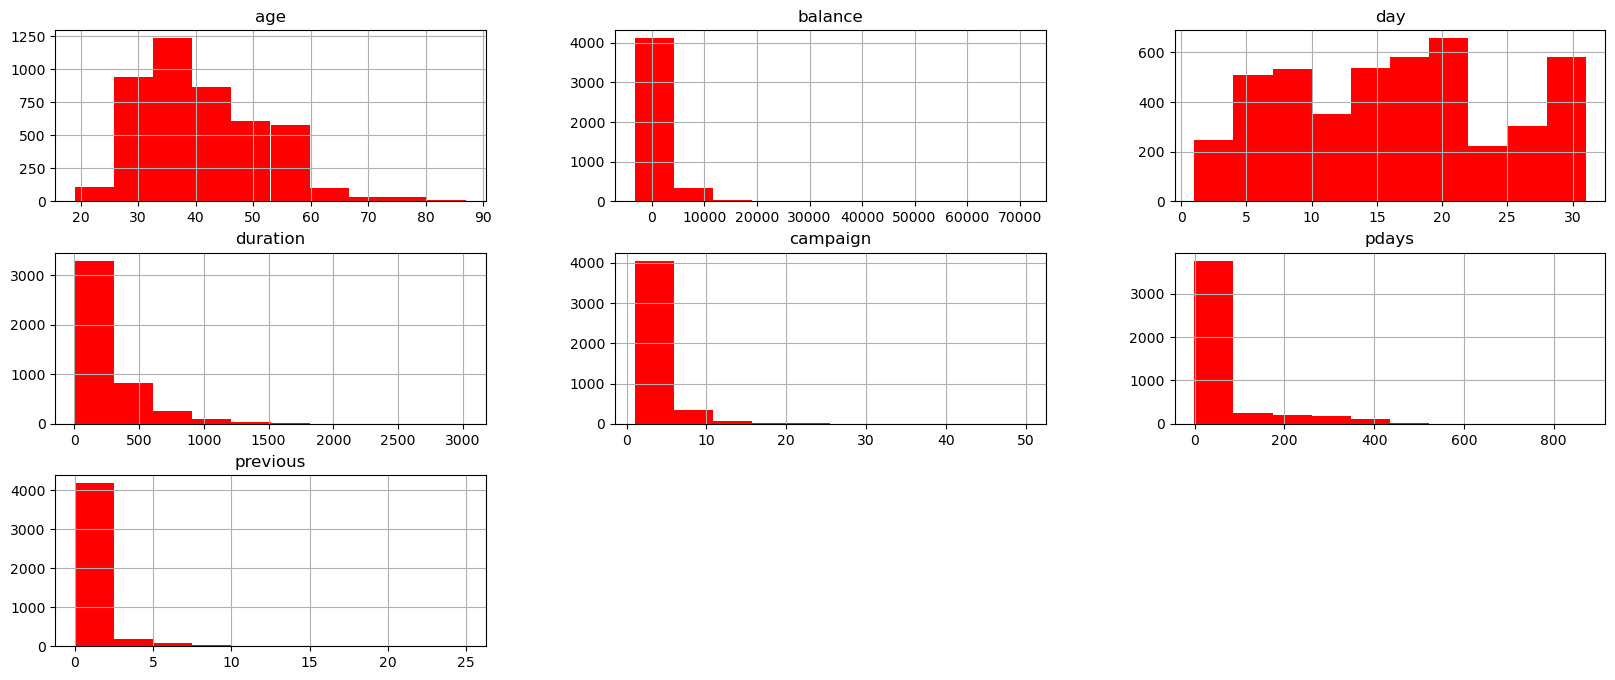

In [10]:
# Plotando o histograma
df.hist(figsize=(20,8), color="r")
plt.show()

In [11]:
#Visualizando 5 primeiras linhas
df.head(5)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,depositou
0,30,unemployed,married,primary,no,1787,no,no,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,5,may,226,1,-1,0,unknown,no


#### A campanha surtiu efeito em 11,5% dos clientes .

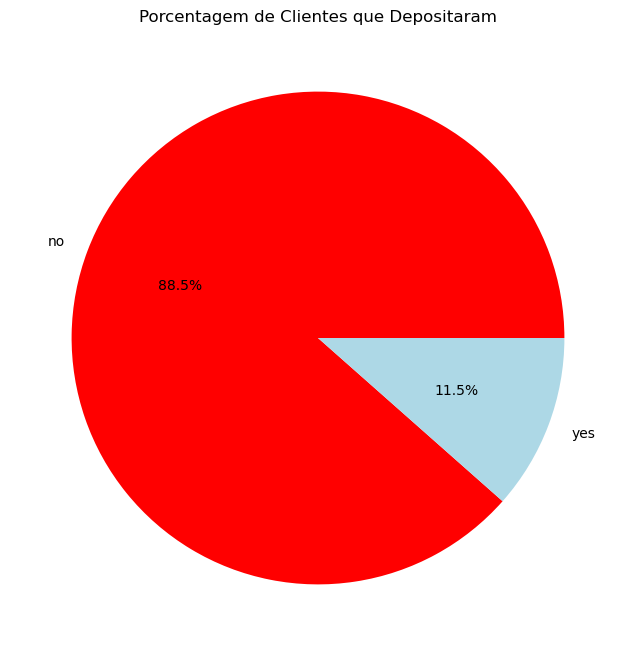

In [12]:
# Calculando a contagem de "depositou_encoded"
depositou_counts = df["depositou"].value_counts()

# Cores para cada fatia
cores = ["red", "lightblue"]

# Criando o gráfico de pizza para "depositou"
plt.figure(figsize=(18,8))
plt.pie(x=depositou_counts, labels=depositou_counts.index, colors=cores, autopct="%1.1f%%")
plt.title("Porcentagem de Clientes que Depositaram")
plt.show()

In [13]:
#Distinção da coluna trabalho
df["job"].unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

# Agora iremos observar algumas variáveis categoricas em relação a nossa variável alvo .

- 1- Imaginava que a diferença de quem tem empréstimo habitacional seria maior
- 2- Temos poucos clientes com crédito inadimplente
- 3- Temos uma tendência de quanto mais contatos durante a campanha, mais clientes fizeram o deposito. Mas também cresce  o número de que nao teve efetividade na campanha .


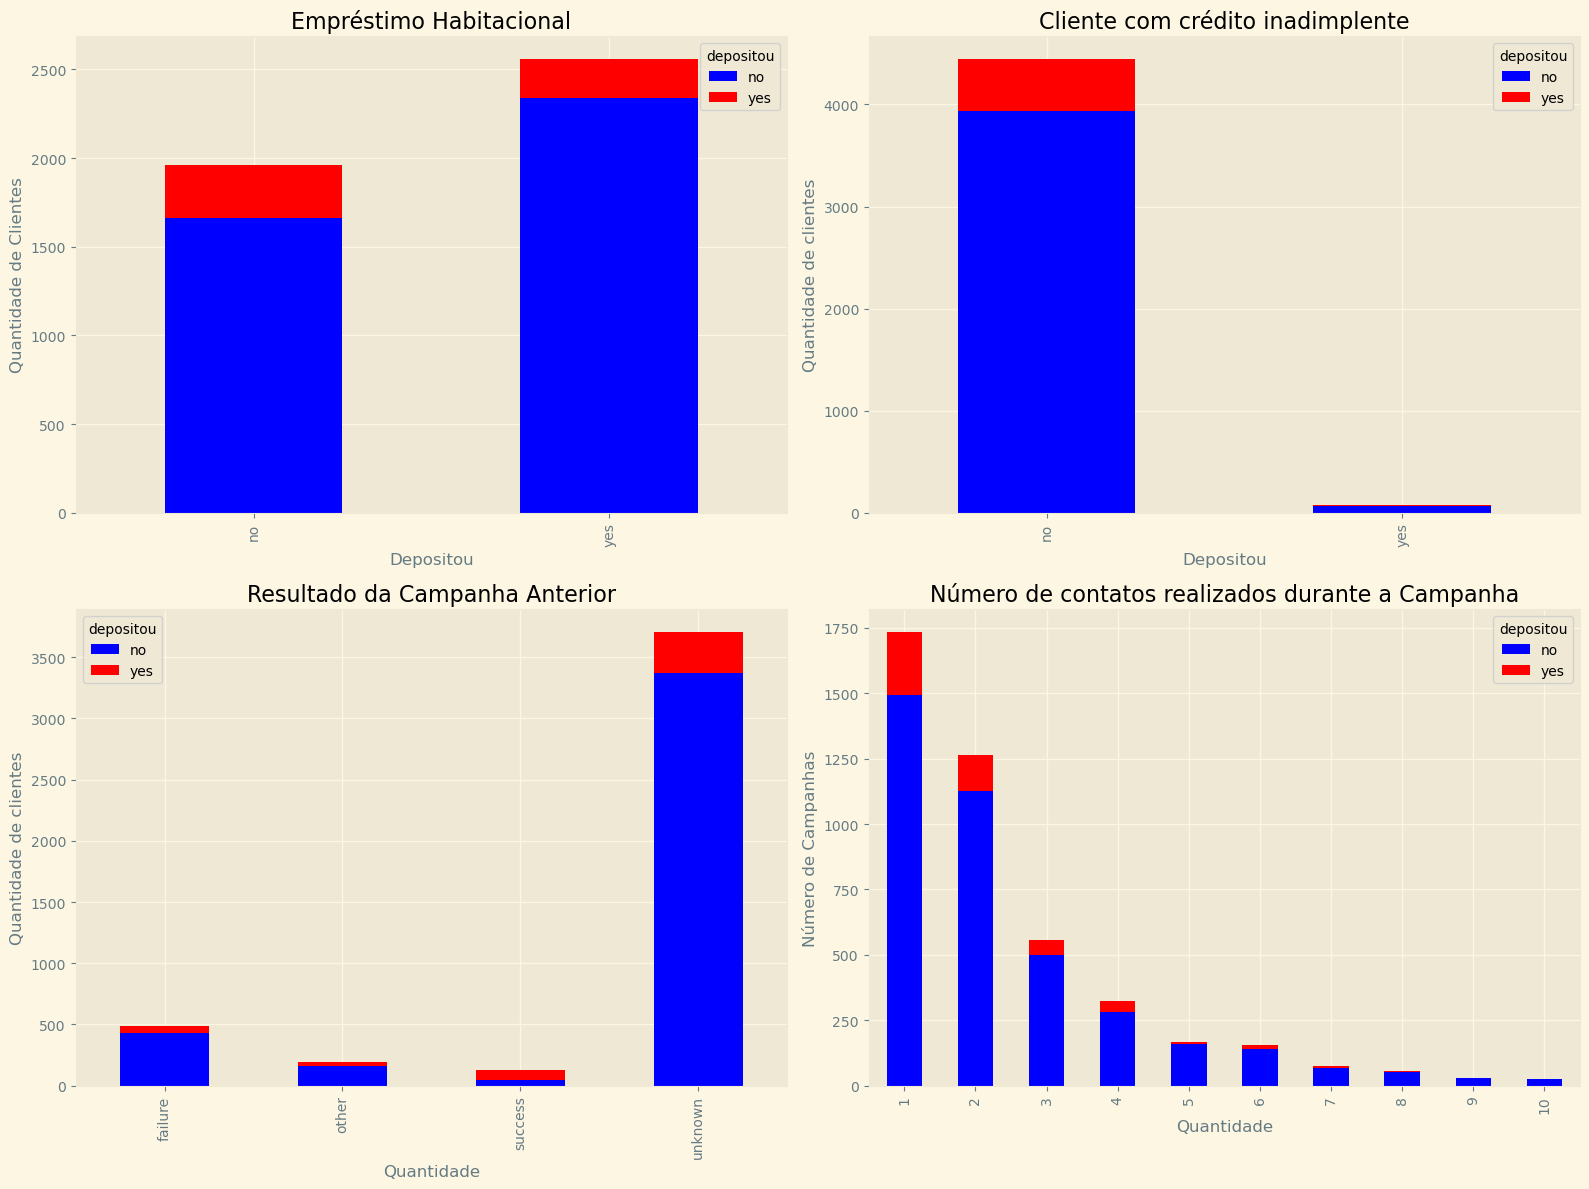

In [14]:
plt.style.use("Solarize_Light2")
# Criando os subplots
fig, ax = plt.subplots(2, 2, figsize=(16, 12))

# Gráfico 1: Comparação entre "housing" e "depositou"
df.groupby(["housing", "depositou"]).size().unstack().plot(kind="bar", stacked=True, ax=ax[0, 0], color=["b", "r"])
ax[0, 0].set_title("Empréstimo Habitacional")
ax[0, 0].set_xlabel("Depositou")
ax[0, 0].set_ylabel("Quantidade de Clientes")

# Gráfico 2: Comparação entre "default" e "depositou"
df.groupby(["default", "depositou"]).size().unstack().plot(kind="bar", stacked=True, ax=ax[0, 1], color=["b", "r"])
ax[0, 1].set_title("Cliente com crédito inadimplente")
ax[0, 1].set_xlabel("Depositou")
ax[0, 1].set_ylabel("Quantidade de clientes")

# Gráfico 3: Comparação entre "poutcome" e "depositou"
df.groupby(["poutcome", "depositou"]).size().unstack().plot(kind="bar", stacked=True, ax=ax[1, 0], color=["b", "r"])
ax[1, 0].set_title("Resultado da Campanha Anterior")
ax[1, 0].set_xlabel("Quantidade")
ax[1, 0].set_ylabel("Quantidade de clientes")

# Filtrando dados para campanhas menores que 10
df_tcampa = df[df["campaign"] < 11]

# Gráfico 4: Comparação entre "campaign" e "depositou"
df_tcampa.groupby(["campaign", "depositou"]).size().unstack().plot(kind="bar", stacked=True, ax=ax[1, 1], color=["b", "r"])
ax[1, 1].set_title("Número de contatos realizados durante a Campanha")
ax[1, 1].set_xlabel("Quantidade")
ax[1, 1].set_ylabel("Número de Campanhas")

# Ajustando o layout
plt.tight_layout()
# Exibindo os gráficos
plt.show()


In [15]:
df.default.value_counts(1)

default
no     0.98319
yes    0.01681
Name: proportion, dtype: float64

### Como previsto pessoas com empréstimo pessoal, a campanha não foi nada efetiva...  !

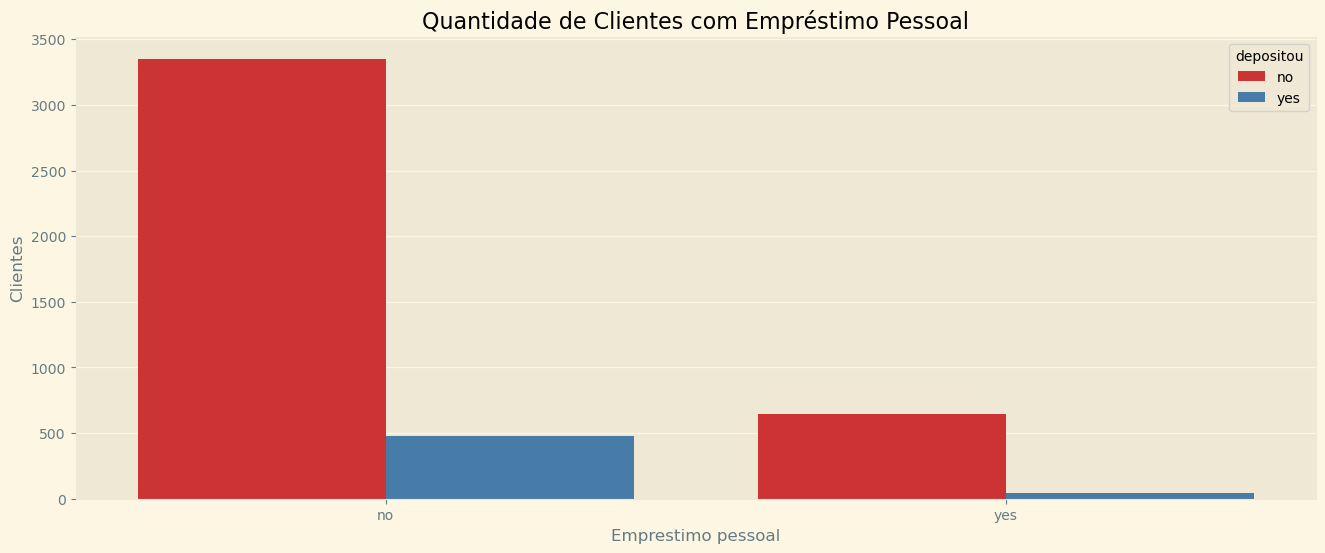

In [16]:

# Define o tamanho da figura
fig, ax = plt.subplots(figsize=(16, 6))

# Plotagem do gráfico de barras
sns.barplot(x="loan",                                             
            y="count",                                            
            hue="depositou",                                       
            data=df.groupby(["loan", "depositou"]).size().reset_index(name="count"),  # DataFrame de origem dos dados
            ax=ax,                                                  
            palette="Set1")                                          

# Adiciona rótulos e título ao gráfico
ax.set_xlabel("Emprestimo pessoal")                                          
ax.set_ylabel("Clientes")                                           
ax.set_title("Quantidade de Clientes com Empréstimo Pessoal")        

# Exibe o gráfico
plt.show()



### Muitos clientes somente com o ensino médio e casados. Grande quantidade desses, não participaram de fato da campanha .

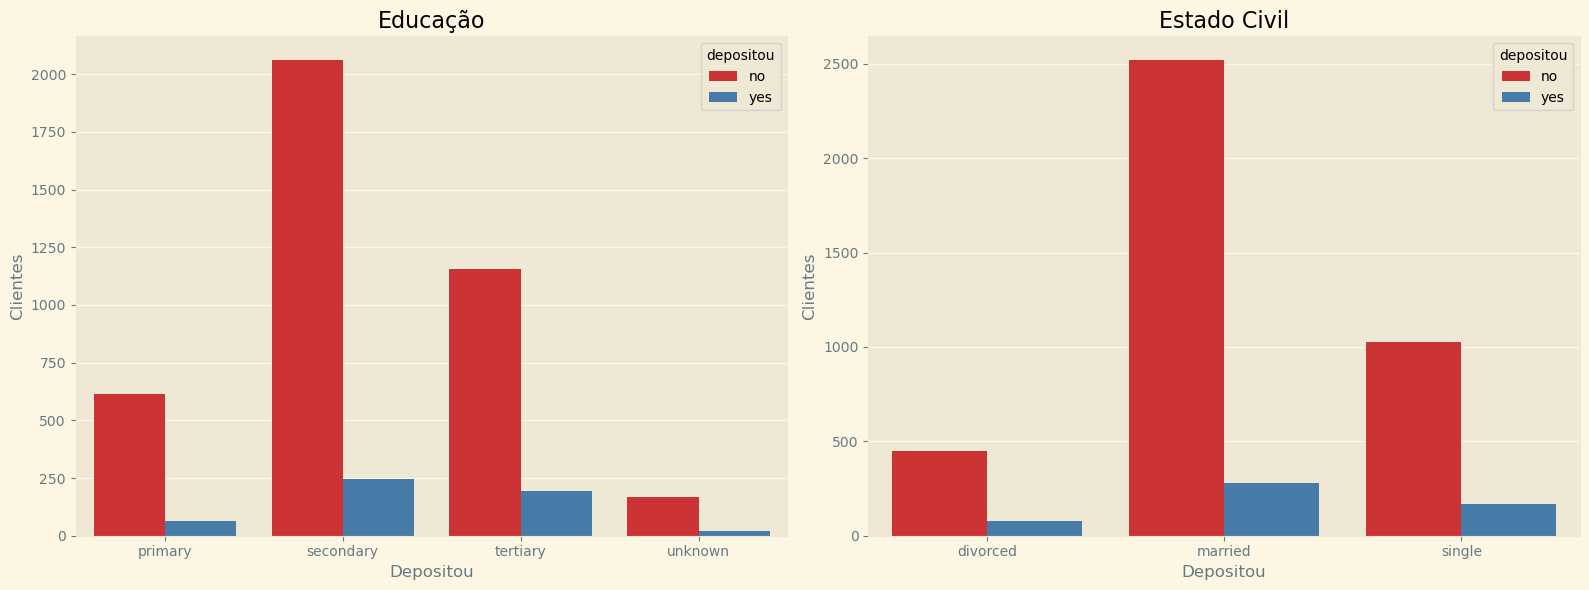

In [17]:
# Define o tamanho da figura e o número de subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Plotagem do primeiro gráfico de barras
sns.barplot(x="education", y="count", hue="depositou", data=df.groupby(["education", "depositou"]).size().reset_index(name="count"), ax=ax[0], palette="Set1")

# Adiciona rótulos e título ao primeiro gráfico
ax[0].set_xlabel("Depositou")  # Rótulo do eixo x
ax[0].set_ylabel("Clientes")   # Rótulo do eixo y
ax[0].set_title("Educação")    # Título do gráfico

# Plotagem do segundo gráfico de barras
sns.barplot(x="marital", y="count", hue="depositou", data=df.groupby(["marital", "depositou"]).size().reset_index(name="count"), ax=ax[1], palette="Set1")

# Adiciona rótulos e título ao segundo gráfico
ax[1].set_xlabel("Depositou")  # Rótulo do eixo x
ax[1].set_ylabel("Clientes")   # Rótulo do eixo y
ax[1].set_title("Estado Civil") # Título do gráfico

# Ajusta a disposição dos subplots para evitar sobreposição
plt.tight_layout()

# Exibe os gráficos
plt.show()


### Podemos ver que os dois outliers são casados e a vida de divorciado anda difícil como esperado 🤣

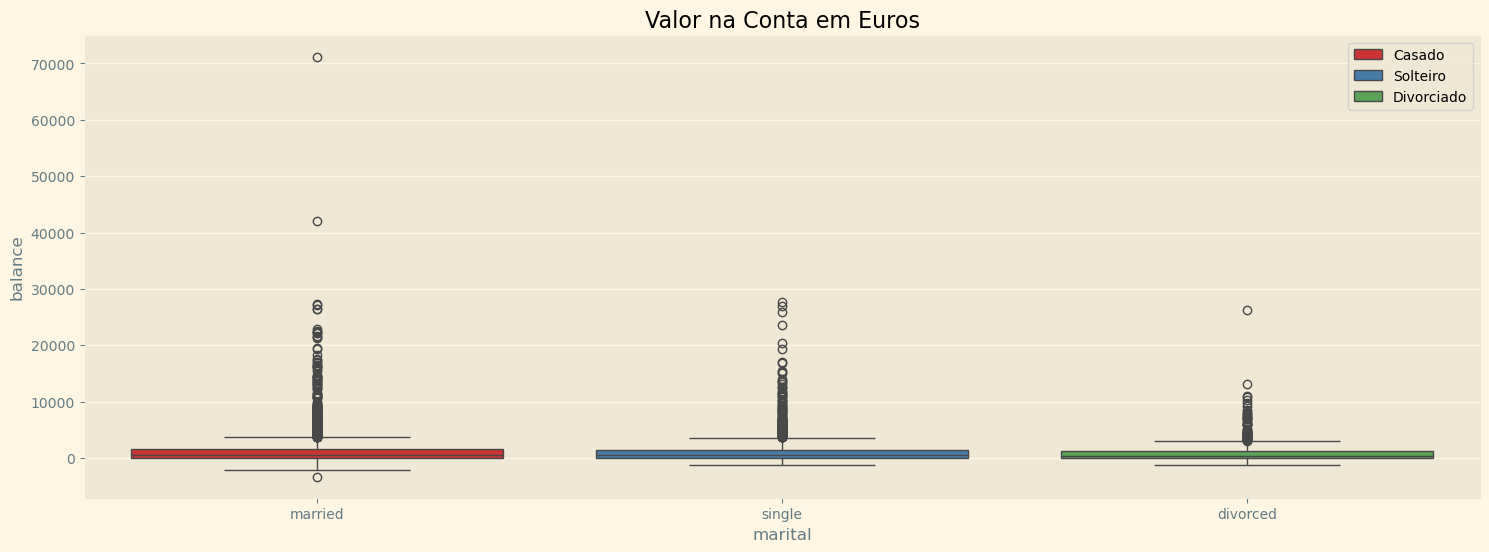

In [18]:
#Tamanho do gráfico
fig = plt.figure(figsize=(18,6))
sns.boxplot(x="marital", y="balance", data=df, palette="Set1")

# Adicionar título
plt.title("Valor na Conta em Euros")

# Adicionar legenda
plt.legend(labels=["Casado", "Solteiro", "Divorciado"])

# Mostrar gráfico
plt.show()

- Mesmo os clientes que tem mais dinheiro na conta, não indica que a campanha foi efetiva de fato para esses clientes, como observado  no Q3 dos que não depositaram (ou seja 25%).

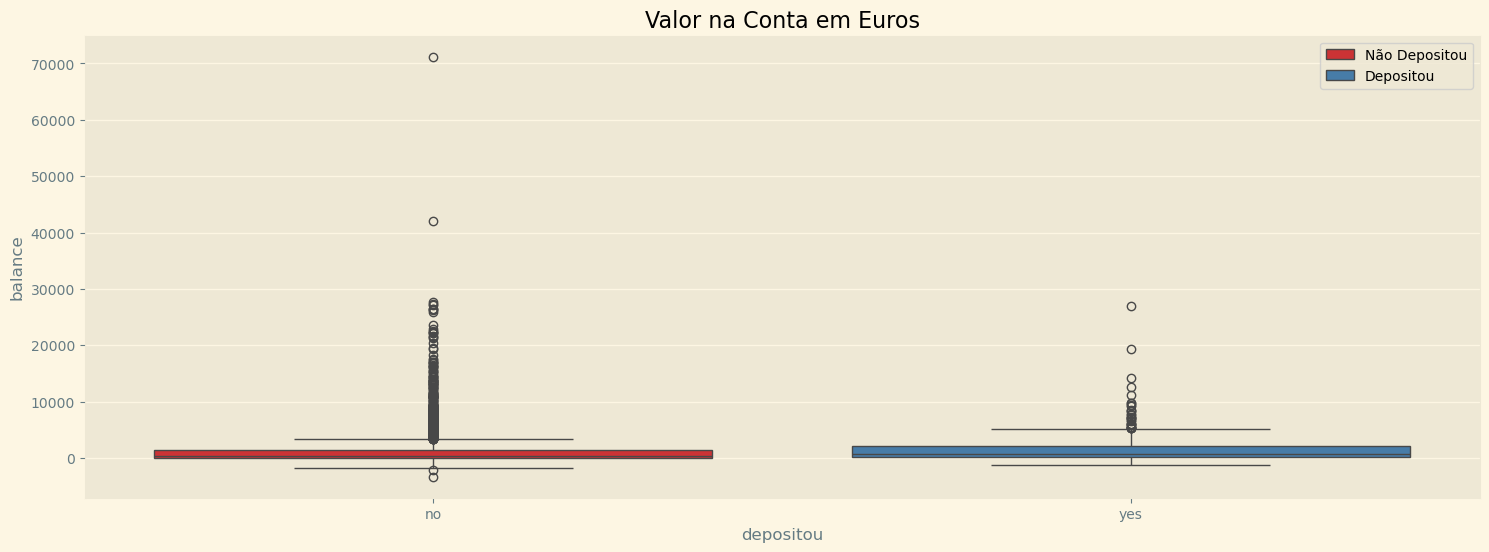

In [19]:
#Tamanho do gráfico
fig = plt.figure(figsize=(18,6))
sns.boxplot(x="depositou", y="balance", data=df, palette="Set1")

# Adicionar título
plt.title("Valor na Conta em Euros")

# Adicionar legenda
plt.legend(labels=["Não Depositou", "Depositou"])

# Mostrar gráfico
plt.show()

### Esse gráfico mostra o máximo e o minimo por situação e atual emprego, fiz para entender como estão as profissões em relação a nossa variável

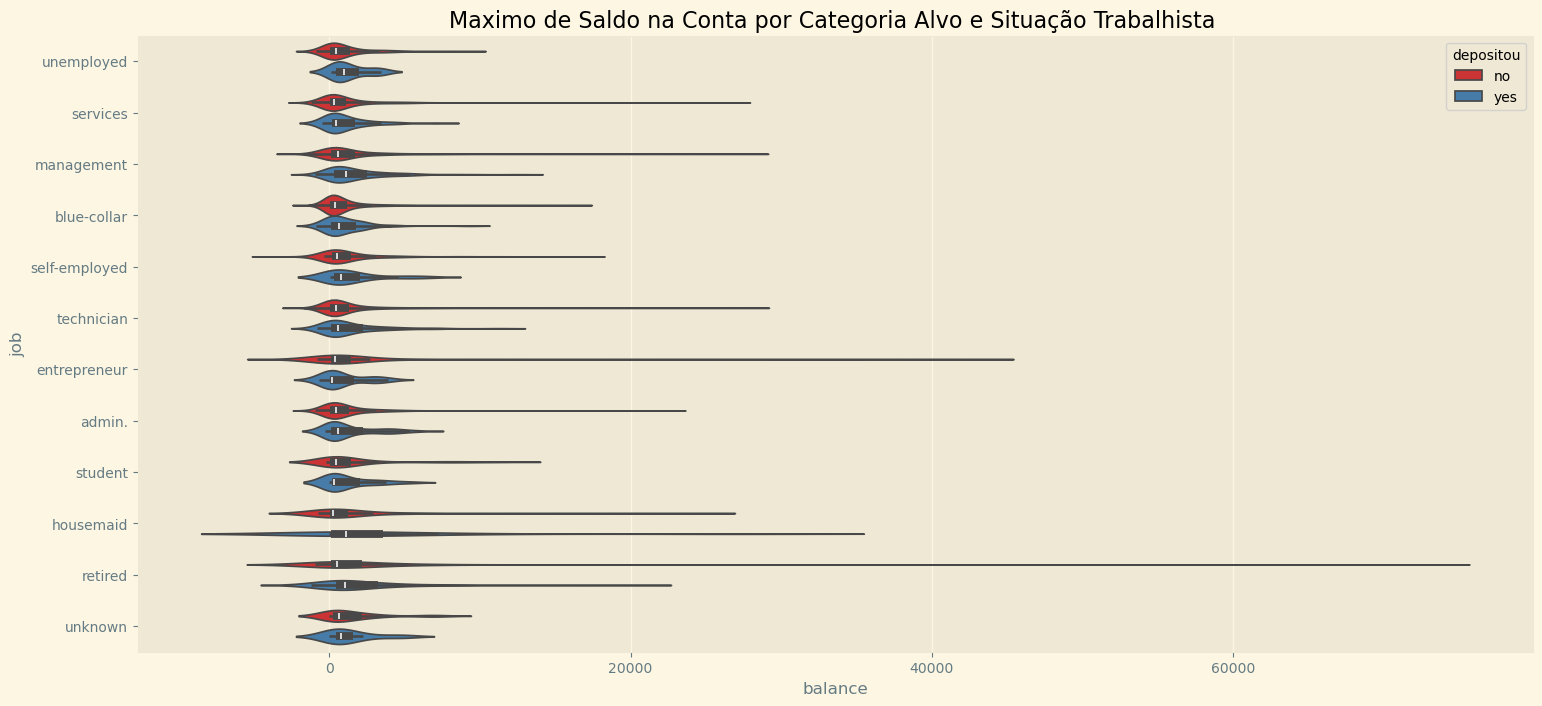

In [20]:
# Define o tamanho da figura do gráfico
fig = plt.figure(figsize=(18,8))

# Cria um gráfico de violino
sns.violinplot(x="balance",             # Variável no eixo x
               y="job",                 # Variável no eixo y
               hue="depositou",        # Variável para dividir as violas
               palette="Set1",         # Paleta de cores
               data=df);                # DataFrame de origem dos dados

# Define o título do gráfico
plt.title("Maximo de Saldo na Conta por Categoria Alvo e Situação Trabalhista ", fontsize=16)

# Exibe o gráfico
plt.show()


- Acima dos 60 anos temos um bom crescimento de volume em comparação aos que nao depositaram, temos um grande volume de clientes com a idade de cerca de 34 anos.

In [21]:
#Moda
moda_age = df["age"].mode().values[0]
print(f"A maioria dos clientes tem ", moda_age, "anos")

A maioria dos clientes tem  34 anos


# O gráfico de violino mostra a distribuição completa dos dados, incluindo sua forma, dispersão e assimetria. Isso é útil para entender a natureza dos dados e podemos identificar padrões.

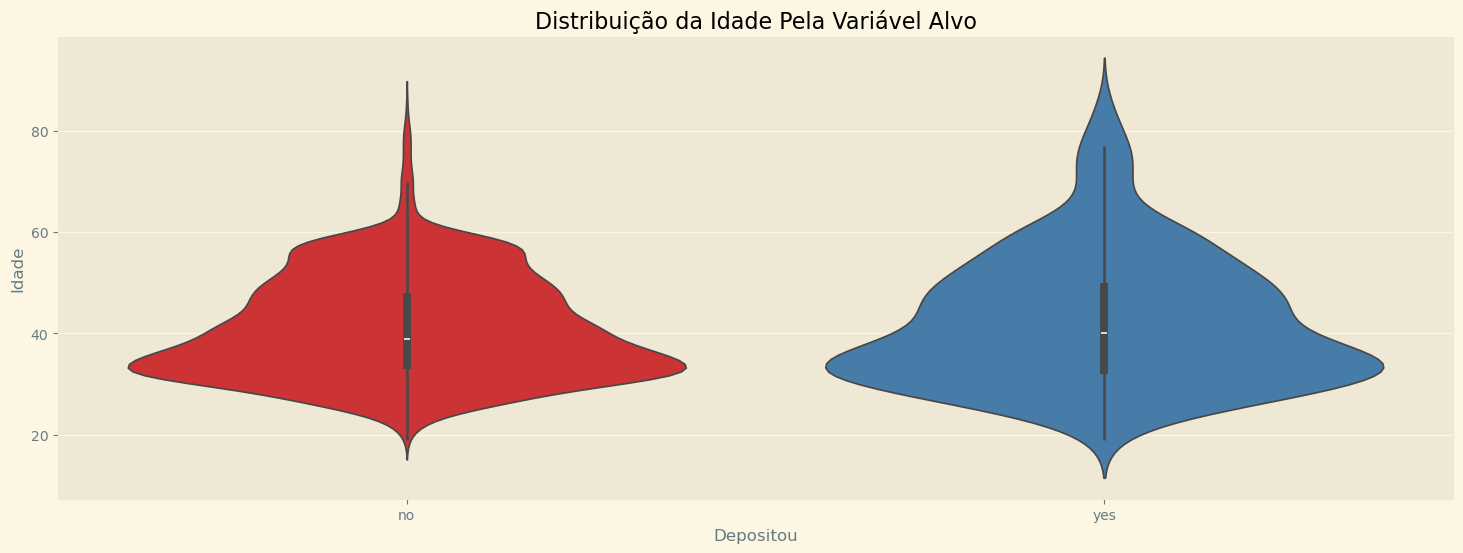

In [22]:

#Tamanho do gráfico
plt.figure(figsize=(18, 6))

sns.violinplot(x="depositou", y="age",palette="Set1", data=df)
#Título e labels
plt.title("Distribuição da Idade Pela Variável Alvo")
plt.xlabel("Depositou")
plt.ylabel("Idade")
#Mostrar o grafico
plt.show()

### Verificando a distribuição de duração pela nossa variável .
- Pela distribuição indica que foi o parâmetro que mais se justificou pela campanha de market foi o tempo de duração do último contato .

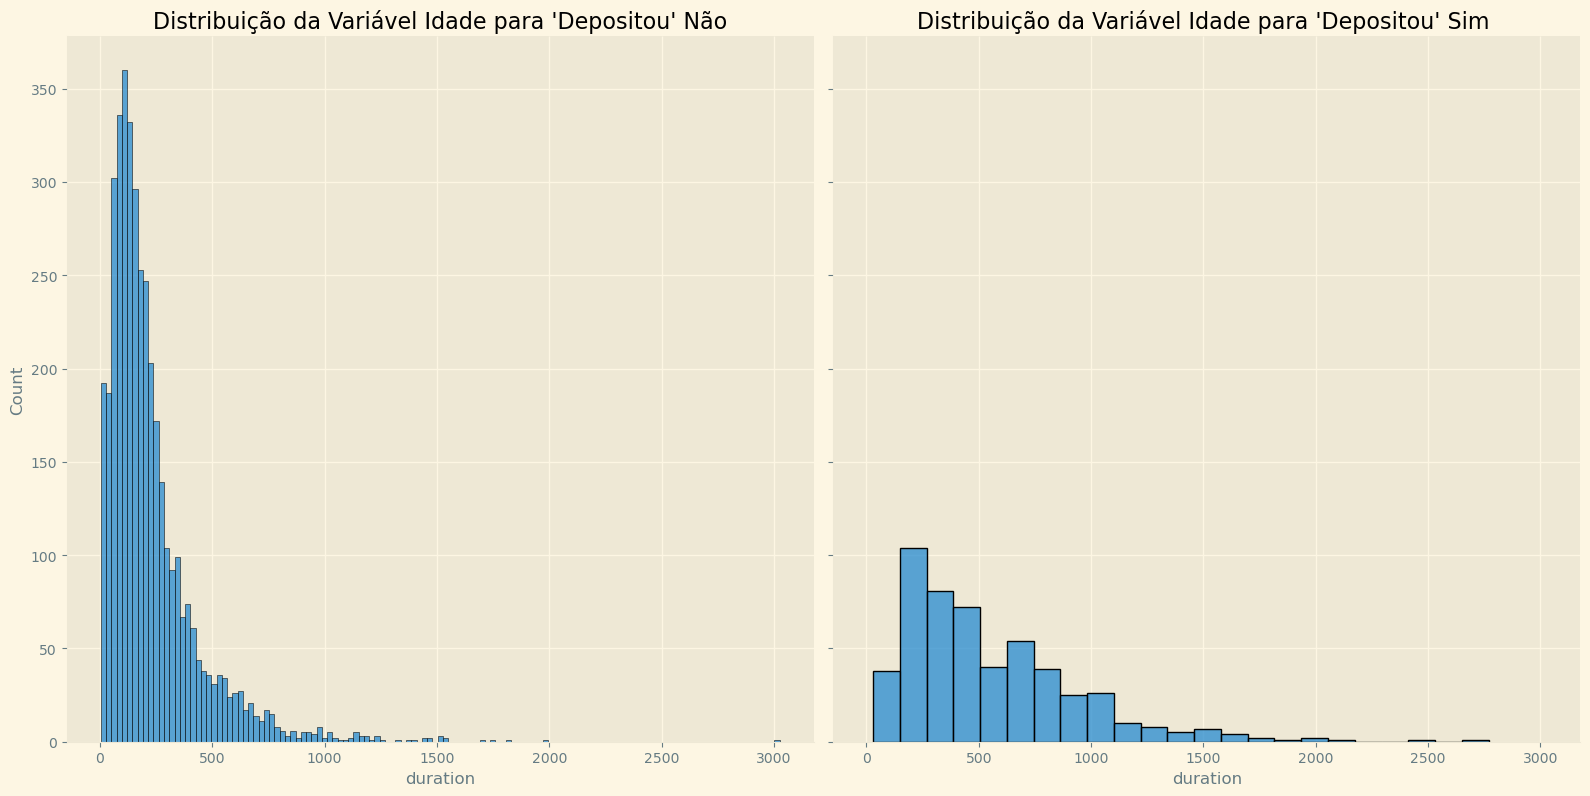

In [23]:
# Criar um FacetGrid
his = sns.FacetGrid(df, col="depositou", height=8)

# Mapear o histograma para a coluna "duration"
his.map(sns.histplot, "duration")

# Adicionar título ao primeiro gráfico (para depositou=0)
his.axes[0, 0].set_title("Distribuição da Variável Idade para 'Depositou' Não" )

# Adicionar título ao segundo gráfico (para depositou=1)
his.axes[0, 1].set_title("Distribuição da Variável Idade para 'Depositou' Sim ")

# Mostrar o FacetGrid
plt.show()

In [24]:
#Últimas 5 linhas
df.tail()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,depositou
4516,33,services,married,secondary,no,-333,yes,no,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,3,apr,345,2,249,7,other,no


### Este gráfico mostra como as diferentes variáveis numéricas do conjunto de dados estão relacionadas entre sí, mas o maior objetivo é ver como estão se relacionando com minha variável alvo. As cores indicam o tipo e a força dessa relação de acordo com a legenda de cores, quanto mais proximo do um maior a relação entre elas.
- Realmente no mostrou que o elemento que mais se carácteriza pela efetividade da campanha foi a duração do telefonema .


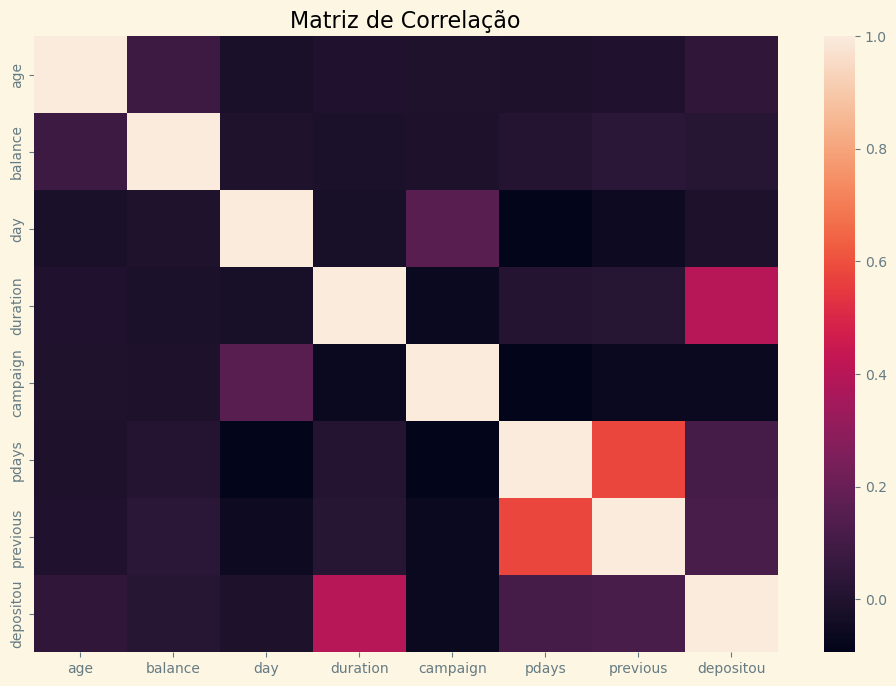

In [25]:
# Importando bibliotecas necessária para transformar nossa variável
from sklearn.preprocessing import  LabelEncoder

# Criando uma figura para o gráfico com tamanho específico
fig = plt.figure(figsize=(12,8))

# Transformando a variável alvo 'depositou' usando LabelEncoder para torná-la numérica
df["depositou"] = LabelEncoder().fit_transform(df["depositou"])

# Selecionando apenas as colunas numéricas do DataFrame
df_numerico = df.select_dtypes(exclude="object")

# Calculando a matriz de correlação entre as variáveis numéricas
corr_numeric = df_numerico.corr()

# Plotando um mapa de calor da matriz de correlação
sns.heatmap(corr_numeric, cbar=True)
plt.title("Matriz de Correlação", fontsize=16)
plt.show()


In [26]:
df_numerico.head()

,age,balance,day,duration,campaign,pdays,previous,depositou
0,30,1787,19,79,1,-1,0,0
1,33,4789,11,220,1,339,4,0
2,35,1350,16,185,1,330,1,0
3,30,1476,3,199,4,-1,0,0
4,59,0,5,226,1,-1,0,0


### Variáveis categóricas .

In [27]:
#Somente variáveis categoricas
categoricas=df.select_dtypes(include="object")
categoricas.tail()

,job,marital,education,default,housing,loan,month,poutcome
4516,services,married,secondary,no,yes,no,jul,unknown
4517,self-employed,married,tertiary,yes,yes,yes,may,unknown
4518,technician,married,secondary,no,no,no,aug,unknown
4519,blue-collar,married,secondary,no,no,no,feb,other
4520,entrepreneur,single,tertiary,no,yes,yes,apr,other


### Preparando os dados para nosso modelo de Machine Learning

In [32]:
#Codificar nossas variáveis nominais.
from category_encoders import OrdinalEncoder

#colunas que vou codificar para númericas
ord_enc =OrdinalEncoder(cols=['job', 'default', 'housing', 'loan', 'month', 'poutcome', 'marital','education'])

### Verificando se todas foram reconhecidas como numérica.

In [33]:
#Novo Dataframe com indicadores codificados
novo_df=ord_enc.fit_transform(df)
novo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        4521 non-null   int64
 1   job        4521 non-null   int32
 2   marital    4521 non-null   int32
 3   education  4521 non-null   int32
 4   default    4521 non-null   int32
 5   balance    4521 non-null   int64
 6   housing    4521 non-null   int32
 7   loan       4521 non-null   int32
 8   day        4521 non-null   int64
 9   month      4521 non-null   int32
 10  duration   4521 non-null   int64
 11  campaign   4521 non-null   int64
 12  pdays      4521 non-null   int64
 13  previous   4521 non-null   int64
 14  poutcome   4521 non-null   int32
 15  depositou  4521 non-null   int32
dtypes: int32(9), int64(7)
memory usage: 406.3 KB


### Possíveis nulos

In [34]:
novo_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
depositou    0
dtype: int64

<div align="center">
 <h1> Balanceamento da nossa variável alvo  </h1>

### Aqui podemos ver que nossa variável alvo, está totalmente desbalanceada, o que é pessimo para um modelo de ML, O balanceamento é importante porque afeta diretamente o desempenho e a interpretação do modelo de machine learning. Aqui estão algumas razões pelas quais o balanceamento da variável alvo é crucial:

 ### 1- Se a variável alvo estiver desbalanceada, o modelo pode aprender a favorecer a classe majoritária em detrimento da classe minoritária. Isso pode resultar em um viés no modelo, onde ele tem um desempenho melhor na classe majoritária e pior na classe minoritária.

 ### 2- A precisão do modelo pode ser enganosamente alta. Por exemplo, um modelo que prevê sempre a classe majoritária em um conjunto de dados desbalanceado pode alcançar uma alta precisão simplesmente porque a maioria das previsões estará correta para a classe.

 ### 3- Ele pode falhar em identificar corretamente os casos dessa classe, levando a consequências negativas.

 ### 4- Um modelo treinado em um conjunto de dados desbalanceado pode ser menos interpretable, já que suas decisões podem ser distorcidas pela distribuição desigual das classes. Isso pode dificultar a compreensão de como o modelo está tomando suas decisões e quais características são mais importantes para a previsão.

- Quantidade de participação na campanha.

In [35]:
df["depositou"].value_counts()

depositou
0    4000
1     521
Name: count, dtype: int64

- Separando a target do nosso dataframe, para treino e teste

In [36]:
y = novo_df['depositou']  
X = novo_df.drop('depositou', axis=1)

In [37]:
# Importa a função
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

# Cria o balanceador SMOTE
smote_bal = SMOTE()

# Aplicando o balanceador
X_res, y_res = smote_bal.fit_resample(X, y)


### Verificando o balanceamento

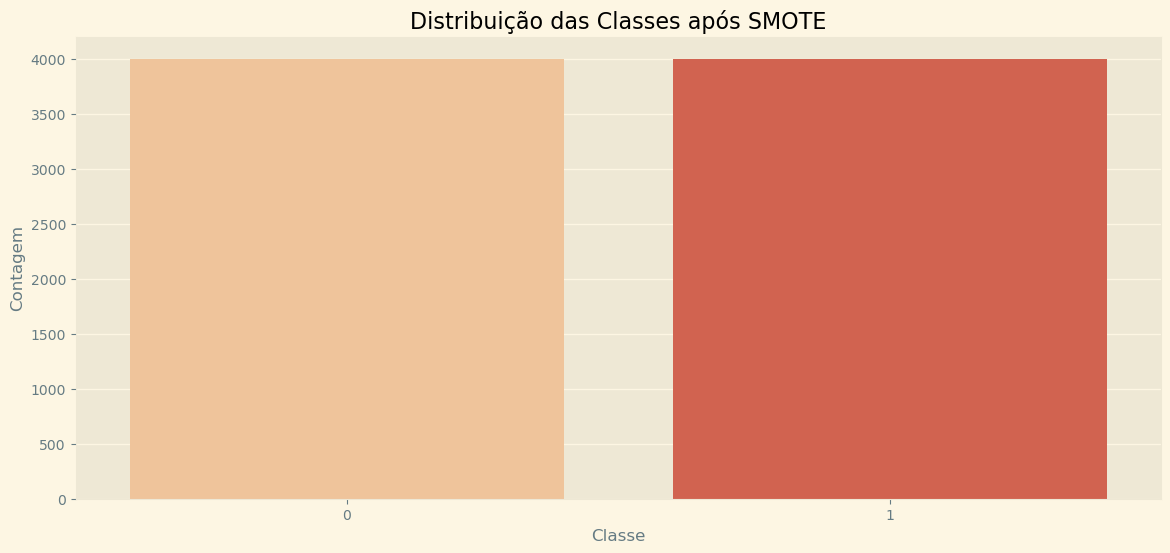

In [38]:
# Plota o gráfico de contagem das classes
plt.figure(figsize=(14, 6))
sns.countplot(x=y_res, palette="OrRd")
plt.xlabel("Classe")
plt.ylabel("Contagem")
plt.title('Distribuição das Classes após SMOTE')
plt.show()


## Plotando o modelo de Arvore de Classificação

- Fiz alguns teste e o modelo se saiu melhor usando o Índice de Gini em relação a entropia .

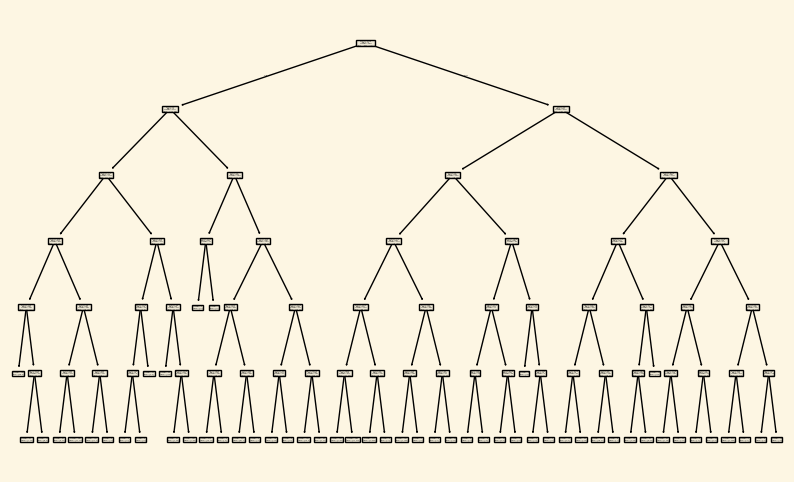

In [39]:
#importando a biblioteca da nossa arvore
from sklearn import tree

#Fracionando os dados para teste e treino
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3) 
#Criando uma instância do classificador de árvore de decisão .
clf = tree.DecisionTreeClassifier()

#Treinando o modelo com os dados de treinamento (X_train e y_train).
clf=clf.fit(X_train, y_train)

#Calculando a precisão do modelo nos dados de treinamento.
clf.score(X_train, y_train)

clf = DecisionTreeClassifier( criterion="gini", max_depth=6)
clf.fit(X_train, y_train)

#Modelo da arvore
plt.figure(figsize=(10,6))
tree.plot_tree(clf)
plt.show()

In [40]:
y_pred=clf.predict(X_test)

# Importando a função confusion_matrix
from sklearn.metrics import confusion_matrix

# Calculando a matriz de confusão entre os valores reais e as previsões
confusion_matrix(y_test,y_pred)


array([[ 981,  210],
       [ 180, 1029]], dtype=int64)

<div align="center">
 <h1> Avaliação do Modelo </h1>
 </div>

### Resumidamente, uma matriz de confusão é uma tabela que mostra o desempenho de um modelo de classificação, comparando as previsões reais com as previsões feitas pelo modelo. Ela contém quatro células:

- True Positives (TP): Amostras corretamente classificadas como positivas.
- False Positives (FP): Amostras incorretamente classificadas como positivas.
- True Negatives (TN): Amostras corretamente classificadas como negativas.
- False Negatives (FN): Amostras incorretamente classificadas como negativas.
- Essas informações são úteis para entender os erros do modelo e calcular métricas de avaliação, como precisão, recall e pontuação F1.

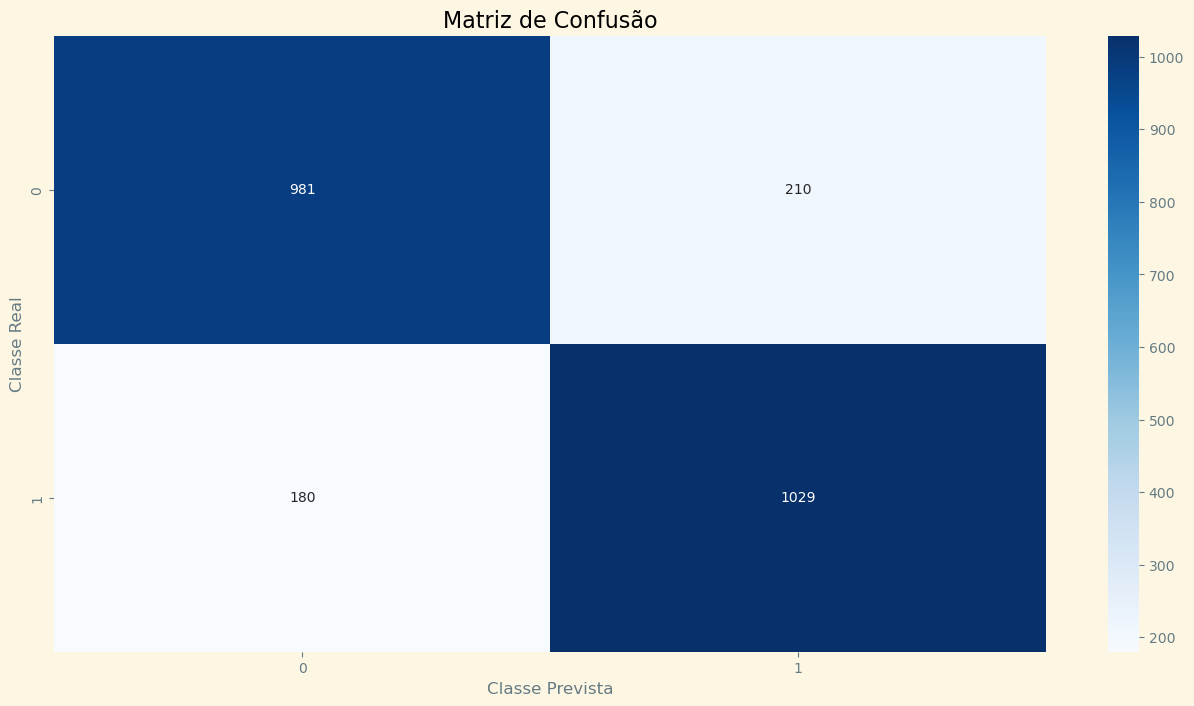

In [41]:
# Calcula a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualiza a matriz de confusão como um mapa de calor
plt.figure(figsize=(16, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()


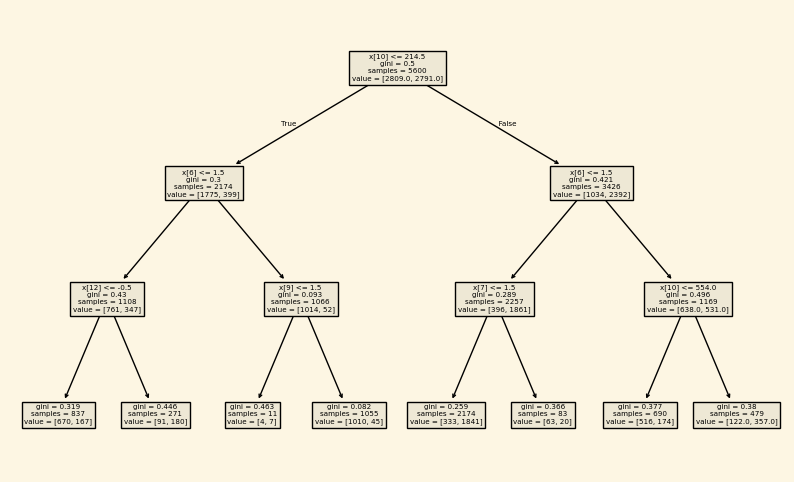

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Criar e treinar o modelo de árvore de decisão
clf2 = DecisionTreeClassifier(criterion="gini", max_depth=3)
clf2.fit(X_train, y_train)

# Configurar a visualização da árvore de decisão
plt.figure(figsize=(12, 8))
plot_tree(
    clf2,
    filled=True,
    feature_names=X_train.columns,   # substitua por nomes das colunas do X_train
    class_names=True,
    rounded=True
)

# Salvar a imagem em alta qualidade
plt.savefig("arvore_decisao.png", dpi=300, bbox_inches="tight")

# Mostrar a árvore de decisão
plt.show()


### Distribuição 

In [43]:
#Matrix da confusão
y_pred2=clf2.predict(X_test)
confusion_matrix(y_test,y_pred2)

array([[ 955,  236],
       [ 198, 1011]], dtype=int64)

### Precision (Precisão): Proporção de verdadeiros positivos em relação a todos os exemplos classificados como positivos pelo modelo.

### Recall (Recall ou Sensibilidade): Proporção de verdadeiros positivos em relação a todos os exemplos verdadeiramente positivos no conjunto de dados.

### F1-score: Média harmônica da precisão e do recall. Oferece uma métrica única que equilibra precisão e recall.

- Essas métricas fornecem uma visão geral do desempenho do modelo de classificação, ajudando a entender sua capacidade de fazer previsões precisas e identificar padrões corretamente.

In [44]:
# Exibir o relatório de classificação
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred2))

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81      1191
           1       0.81      0.84      0.82      1209

    accuracy                           0.82      2400
   macro avg       0.82      0.82      0.82      2400
weighted avg       0.82      0.82      0.82      2400



# Precisão média.

In [45]:
# Calcular a precisão média do modelo
accuracy = accuracy_score(y_test, y_pred2)
# Exibir a precisão média
print("Precisão média do modelo:", accuracy)

Precisão média do modelo: 0.8191666666666667
